<html lang="uk">
<head>
    <meta charset="UTF-8">
    <title>Лабораторна робота 2</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
            margin: 40px;
        }
        h1 {
            text-align: center;
        }
        h2 {
            font-weight: bold;
            font-size: 22px;
            margin-top: 30px;
        }
        ul {
            margin-top: 10px;
        }
        li {
            margin-bottom: 10px;
        }
    </style>
</head>
<body>
    <h1>Лабораторна робота 2</h1>

    <p><b>Тема:</b> Основи роботи з сигналами в Python.</p>
    <p><b>Мета:</b> Закріпити теоретичні знання щодо моделювання періодичних сигналів за допомогою ряду Фур’є та різних систем базисних функцій, набути навичок гармонічного аналізу та синтезу.</p>

    <h2>Завдання для самостійної роботи</h2>
    <ol>
        <li>
            Згідно із заданим варіантом розглянути періодичний сигнал та розкласти його спочатку:
            <ul>
                <li>У тригонометричний ряд Фур’є, отримавши коефіцієнти ряду <i>a<sub>k</sub></i> та <i>b<sub>k</sub></i>. Виконати синтез сигналу. Побудувати відповідні графіки.</li>
                <li>У тригонометричний ряд Фур’є, отримавши коефіцієнти <i>A<sub>k</sub></i>, <i>φ<sub>k</sub></i>. Побудувати амплітудний та фазовий спектр. Виконати синтез сигналу.</li>
                <li>У комплексний ряд Фур’є. Побудувати амплітудний та фазовий спектри. Виконати синтез сигналу.</li>
                <li>У ряд Фур’є за системою базисних функцій Уолша–Пелі.</li>
                <li>Кількість гармонік: <b>N = 8 – 10</b>. Побудувати відповідний спектр сигналу. Виконати синтез сигналу.</li>
            </ul>
        </li>
        <li>
            Синтезувати (відновити) сигнали у кожному базисі. Зобразити на одному графіку вихідний сигнал, синтезований за допомогою тригонометричного ряду Фур’є та синтезований за допомогою базису Уолша–Пелі.
        </li>
        <li>
            Обчислити норму похибки апроксимації для кожного з базисів для одного й того самого значення <b>N</b>. Зробити висновки щодо якості апроксимації кожним з методів.
        </li>
    </ol>
</body>
</html>

<img src="scr\Screenshot_2.png" alt="!" style="display:block; margin:auto; width:70%;">

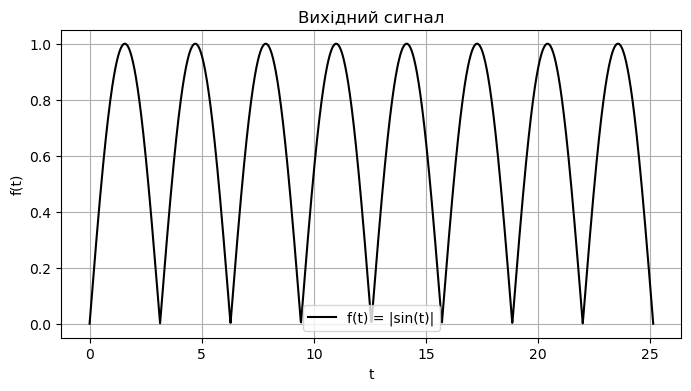

In [23]:
# 1. Вихідний сигнал

T = 2*np.pi
t = np.linspace(0, 4*T, 2000)
f = np.abs(np.sin(t))

plt.figure(figsize=(8,4))
plt.plot(t, f, label="f(t) = |sin(t)|", color="black")
plt.title("Вихідний сигнал")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid(True)
plt.legend()
plt.show()

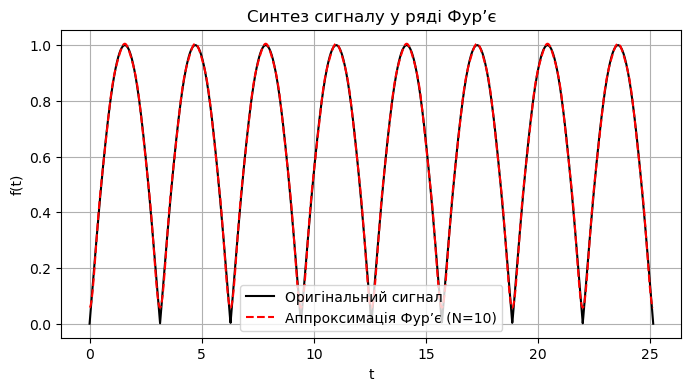

In [22]:
# 2. Тригонометричний ряд Фур’є

def fourier_series(t, N):
    a0 = 4/np.pi
    result = a0/2
    for k in range(2, N+1, 2):  # тільки парні k
        ak = -4/(np.pi*(k**2 - 1))
        result += ak * np.cos(k*t)
    return result

N = 10
f_approx = fourier_series(t, N)

plt.figure(figsize=(8,4))
plt.plot(t, f, label="Оригінальний сигнал", color="black")
plt.plot(t, f_approx, "--", label=f"Аппроксимація Фур’є (N={N})", color="red")
plt.title("Синтез сигналу у ряді Фур’є")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.legend()
plt.grid(True)
plt.show()

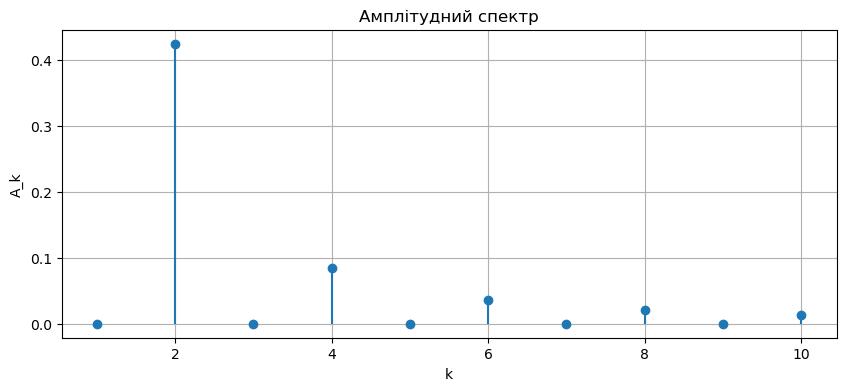

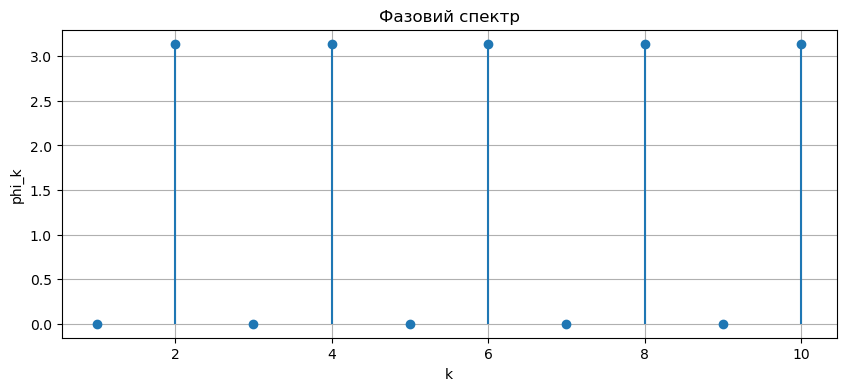

In [21]:
# 3. Амплітудний і фазовий спектри

a_vals = []
k_vals = []

for k in range(1, N+1):
    if k % 2 == 0:
        ak = -4/(np.pi*(k**2-1))
    else:
        ak = 0
    a_vals.append(ak)
    k_vals.append(k)

A_vals = np.abs(a_vals)
phi_vals = [0 if a >= 0 else np.pi for a in a_vals]

plt.figure(figsize=(10,4))
plt.stem(k_vals, A_vals, basefmt=" ")
plt.title("Амплітудний спектр")
plt.xlabel("k")
plt.ylabel("A_k")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.stem(k_vals, phi_vals, basefmt=" ")
plt.title("Фазовий спектр")
plt.xlabel("k")
plt.ylabel("phi_k")
plt.grid(True)
plt.show()

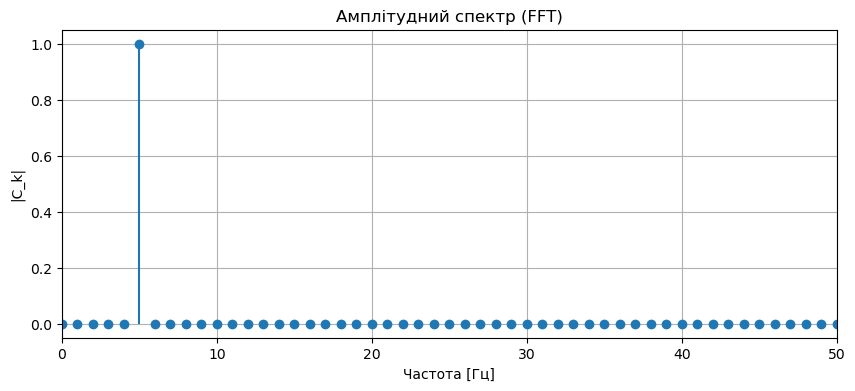

In [27]:
# 4. Комплексний ряд Фур’є (через FFT)

Fs = 1000
T = 1
f0 = 5

t = np.linspace(0, T, Fs, endpoint=False)
x = np.sin(2*np.pi*f0*t)

# FFT
N = len(x)
X = np.fft.fft(x)/N
freqs = np.fft.fftfreq(N, 1/Fs)

X_magnitude = 2*np.abs(X[:N//2])
freqs_pos = freqs[:N//2]

plt.figure(figsize=(10,4))
plt.stem(freqs_pos, X_magnitude, basefmt=" ")
plt.title("Амплітудний спектр (FFT)")
plt.xlabel("Частота [Гц]")
plt.ylabel("|C_k|")
plt.xlim(0, 50)
plt.grid(True)
plt.show()

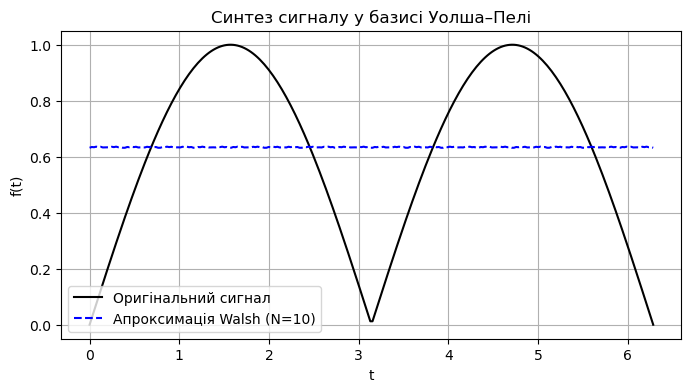

In [19]:
# 5. Ряд Уолша–Пелі

def walsh_matrix(n):
    return hadamard(n)


def walsh_approx(signal, N):
    M = len(signal)
    H = hadamard(M) / np.sqrt(M)
    coeffs = H @ signal
    approx = H[:, :N] @ coeffs[:N]
    return approx

M = 256
t_w = np.linspace(0, T, M)
f_w = np.abs(np.sin(t_w))
N_w = 10
f_w_approx = walsh_approx(f_w, N_w)

plt.figure(figsize=(8,4))
plt.plot(t_w, f_w, label="Оригінальний сигнал", color="black")
plt.plot(t_w, f_w_approx, "--", label=f"Апроксимація Walsh (N={N_w})", color="blue")
plt.title("Синтез сигналу у базисі Уолша–Пелі")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
def error_norm(original, approx):
    return np.sqrt(np.mean((original - approx)**2))

err_fourier = error_norm(f, f_approx)
err_walsh = error_norm(f_w, f_w_approx)

print(f"Похибка Фур’є (N={N}): {err_fourier:.5f}")
print(f"Похибка Walsh–Peli (N={N_w}): {err_walsh:.5f}")

Похибка Фур’є (N=10): 0.01012
Похибка Walsh–Peli (N=10): 0.30973


<h1>Контрольні запитання</h1>

<p>1. Як впливає симетрія періодичного сигналу (парна, непарна, відсутність симетрії) на структуру його тригонометричного ряду Фур’є? Наведіть приклади коефіцієнтів <i>a<sub>k</sub></i> та <i>b<sub>k</sub></i>,  які стають нульовими у кожному випадку.</p>

<p>Якщо сигнал парний, то в ньому лишаються тільки косинуси, тобто коефіцієнти b<sub>k</sub>=0. Якщо сигнал непарний, то залишаються тільки синуси, тобто a<sub>k</sub>=0. Якщо ж сигнал без симетрії, то є і синуси, і косинуси.</p>
<p><i>Приклад:</i></p>
<ul>
<li>f(t)=cos(t) → тільки a<sub>k</sub></li>
<li>f(t)=sin(t)</code> → тільки b<sub>k</sub></li>
<li>f(t)=1+sin(t) → і a<sub>k</sub>, і b<sub>k</sub></li>
</ul>

<p>2. Чому для апроксимації прямокутного імпульсу базис Уолша–Пелі часто забезпечує меншу похибку порівняно з базисом Фур’є при однаковій кількості базисних функцій? Поясніть з точки зору властивостей базисних функцій.</p>

<p>Бо функції Уолша–Пелі теж мають прямокутний вигляд (вони кусочно-постійні), і вони краще "підходять" до форми прямокутного сигналу. У тригонометричному базисі (синуси/косинуси) сигнал виходить згладжений і треба більше гармонік, щоб добре відновити. А в Уолша–Пелі кілька функцій уже майже точно повторюють прямокутну форму → похибка менша.</p>

<p>3. Як пов’язані між собою три форми ряду Фур’є (тригонометрична, амплітудно-фазова, комплексна)? Поясніть, як за коефіцієнтами a<sub>k</sub> і b<sub>k</sub> обчислити амплітуду A<sub>k</sub> фазу φ<sub>k</sub> та комплексний коефіцієнт c<sub>k</sub>.</p>

<p>
Тригонометрична форма має a<sub>k</sub>, b<sub>k</sub>.<br>
Амплітудно-фазова: A<sub>k</sub> = √(a<sub>k</sub>²+b<sub>k</sub>²), φ<sub>k</sub>=arctan(-b<sub>k</sub>/a<sub>k</sub>).<br>
Комплексна: c<sub>k</sub>=a<sub>k</sub>/2 - j·b<sub>k</sub>/2.
</p>

<p>4. Що таке узагальнений ряд Фур’є? Наведіть умови, за яких система функцій є ортонормованою, і поясніть, чому це важливо для розкладу сигналу.</p>

<p>Це коли замість стандартних синусів і косинусів ми беремо будь-яку ортонормовану систему функцій (наприклад, поліноми Лежандра, функції Уолша тощо). Умова: система має бути ортонормованою на заданому проміжку. Це важливо, бо тільки тоді можна розкласти будь-який сигнал/функцію по такій системі, і коефіцієнти можна легко знаходити.</p>

<p>5. Чи можна використовувати базис Уолша для апроксимації гладкого синусоїдального сигналу? Яка буде похибка порівняно з базисом Фур’є? Обґрунтуйте.</p>

<p>Можна, але це буде не дуже ефективно. Бо синусоїда — це гладка, плавна функція, а базис Уолша кусочно-постійний. Тому для гарної точності треба буде брати багато базисних функцій → похибка буде більша, ніж у базисі Фур’є, де синус вже є "рідним" елементом.
Отже, так можна, але для синусів краще тригонометричний ряд.</p>